In [35]:
#Using Postgresql to merge and analyse FPL data
version = "310723"

In [36]:
import psycopg2 # python -> psql connection
import psycopg2.extras
import pandas as pd

In [37]:
#Read db settings from local_settings.py
import CJDH_local_settings
dbname = CJDH_local_settings.local_settings['TRDL_PSQL_Analysis']['dbname']
user = CJDH_local_settings.local_settings['TRDL_PSQL_Analysis']['user']
password = CJDH_local_settings.local_settings['TRDL_PSQL_Analysis']['password']

conn = psycopg2.connect(f"dbname={dbname} user={user} password={password}") # Connect to an existing database
# Establish a connection to the database by creating a cursor object
cur = conn.cursor()
conn.autocommit = True  # read documentation understanding when to Use & NOT use 

In [38]:
#fpl
fpl_raw = pd.read_csv("C:/Users/chris/Documents/Coding/python/projects/FPL/FPL_data_ouput/fpl_gw_allyears_updated.csv") 
print(list(fpl_raw.columns))
fpl = fpl_raw[['code_player','web_name','now_cost','team_name','element_type','season','round','fixture','kickoff_time','was_home','opp_team_name','team_h_score','team_a_score','total_points_gw','minutes_gw','goals_scored_gw','assists_gw','expected_goals_gw', 'expected_assists_gw', 'expected_goal_involvements_gw','news','fpl_fixture_merge_code']]
new_raw = pd.read_csv("C:/Users/chris/Documents/Coding/python/projects/FPL/FPL_data_ouput/Player_Summary.csv")
print(list(new_raw.columns))
new = new_raw[['code','now_cost']]
#spi
spi_raw = pd.read_csv('C:/Users/chris/Documents/Coding/python/projects/FPL/FPL_data_ouput/spi_gw_all_years.csv')
print(list(spi_raw.columns))
spi = spi_raw[['season','date','team_name','opp_team_name','venue','spi','opp_spi', 'prob', 'opp_prob', 'probtie', 'proj_score', 'opp_proj_score', 'score', 'opp_score','xg','opp_xg', 'spi_merge_code']]
#bet
bet_raw = pd.read_csv("C:/Users/chris/Documents/Coding/python/projects/FPL/FPL_data_ouput/bet_gw_all_years.csv")
print(list(bet_raw.columns))
bet = bet_raw[['season','team_name_bet', 'opp_team_name_bet','team_goals','opp_team_goals','Bet365_win_odds', 'Bet365_draw_odds', 'Bet365_lose_odds','bet_merge_code']]

C:\Users\chris\AppData\Local\Temp\ipykernel_26616\181450093.py:2: DtypeWarning: Columns (187) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_raw = pd.read_csv("C:/Users/chris/Documents/Coding/python/projects/FPL/FPL_data_ouput/fpl_gw_allyears_updated.csv")


['Unnamed: 0', 'element', 'fixture', 'opponent_team', 'total_points_gw', 'was_home', 'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes_gw', 'goals_scored_gw', 'assists_gw', 'clean_sheets_gw', 'goals_conceded_gw', 'own_goals_gw', 'penalties_saved_gw', 'penalties_missed_gw', 'yellow_cards_gw', 'red_cards_gw', 'saves_gw', 'bonus_gw', 'bps_gw', 'influence_gw', 'creativity_gw', 'threat_gw', 'ict_index_gw', 'value', 'transfers_balance', 'selected', 'transfers_in_gw', 'transfers_out_gw', 'opp_team_name', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'code_player', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form_player', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'total_points_summary', 'transfe

In [39]:
def create_staging_table_fpl(cursor):
    cursor.execute("""
        DROP TABLE IF EXISTS fpl CASCADE;
        CREATE UNLOGGED TABLE fpl (
            code_player             NUMERIC,
            web_name                TEXT,
            now_cost                NUMERIC,
            team_name               TEXT,
            element_type            NUMERIC,
            season                  INT,
            round                   NUMERIC,
            fixture                 NUMERIC,
            kickoff_time            TIMESTAMP,
            was_home                BOOLEAN,
            opp_team_name           TEXT,
            team_h_score            NUMERIC,
            team_a_score            NUMERIC,
            total_points_gw         NUMERIC,
            minutes_gw              NUMERIC,
            goals_scored_gw         NUMERIC,
            assists_gw              NUMERIC,
            expected_goals_gw       NUMERIC,
            expected_assists_gw     NUMERIC,
            expected_goal_involvements_gw NUMERIC,
            news                    TEXT,
            fpl_fixture_merge_code  TEXT
        );""")

# creating our schema  and sending the table to psql
with conn.cursor() as cursor:
    create_staging_table_fpl(cursor)

def create_staging_table_new(cursor):
    cursor.execute("""
        DROP TABLE IF EXISTS new CASCADE;
        CREATE UNLOGGED TABLE new (
            code                    NUMERIC,
            now_cost                NUMERIC
        );""")

# creating our schema  and sending the table to psql
with conn.cursor() as cursor:
    create_staging_table_new(cursor)


def create_staging_table_spi(cursor):
    cursor.execute("""
        DROP TABLE IF EXISTS spi CASCADE;
        CREATE UNLOGGED TABLE spi (
            season                  NUMERIC,
            date                    TIMESTAMP,
            team_name               TEXT,
            opp_team_name           TEXT,
            venue                   TEXT,
            spi                     NUMERIC,
            opp_spi                 NUMERIC,
            prob                    NUMERIC,
            opp_prob                NUMERIC,
            probtie                 NUMERIC,
            proj_score              NUMERIC,
            opp_proj_score          NUMERIC,
            score                   NUMERIC,
            opp_score               NUMERIC,
            xg                      NUMERIC,
            opp_xg                  NUMERIC,
            spi_merge_code          TEXT
        );""")
# creating our schema  and sending the table to psql
with conn.cursor() as cursor:
    create_staging_table_spi(cursor)

def create_staging_table_bet(cursor):
    cursor.execute("""
        DROP TABLE IF EXISTS bet CASCADE;
        CREATE UNLOGGED TABLE bet (
            season                   NUMERIC,
            team_name_bet            TEXT,
            opp_team_name_bet        TEXT,
            team_goals               NUMERIC,
            opp_team_goals           NUMERIC,
            Bet365_win_odds          NUMERIC,
            Bet365_draw_odds         NUMERIC,
            Bet365_lose_odds         NUMERIC,
            bet_merge_code           TEXT
        );""")
# creating our schema  and sending the table to psql
with conn.cursor() as cursor:
    create_staging_table_bet(cursor)

#'season','team_name_bet', 'opp_team_name_bet','team_goals','opp_team_goals','Bet365_win_odds', 'Bet365_draw_odds', 'Bet365_lose_odds','bet_merge_code'

In [40]:
fpl.to_csv('data/fpl_data.csv',index=False)
new.to_csv('data/new_data.csv',index=False)
spi.to_csv('data/spi_data.csv',index=False)
bet.to_csv('data/bet_data.csv',index=False)

def send_csv_to_psql(connection,csv,table):
    sql = "COPY {} FROM STDIN WITH CSV HEADER DELIMITER AS ','".format(table)#STDIN 
    file = open(csv, "r", encoding="utf8")
    with connection.cursor() as cur:
        cur.execute("truncate " + table + ";")  #avoiding uploading duplicate data!
        cur.copy_expert(sql=sql, file=file)
        connection.commit()
    return connection.commit()

send_csv_to_psql(conn,'data/fpl_data.csv','fpl')
send_csv_to_psql(conn,'data/new_data.csv','new')
send_csv_to_psql(conn,'data/spi_data.csv','spi')
send_csv_to_psql(conn,'data/bet_data.csv','bet')

In [41]:
query = """ALTER TABLE fpl
            ADD COLUMN id serial PRIMARY KEY;"""
with conn.cursor() as cur:
    cur.execute(query)

query = """ALTER TABLE new
            ADD COLUMN id serial PRIMARY KEY;"""
with conn.cursor() as cur:
    cur.execute(query)

query = """ALTER TABLE spi
            ADD COLUMN id serial PRIMARY KEY;"""
with conn.cursor() as cur:
    cur.execute(query)

query = """ALTER TABLE bet
            ADD COLUMN id serial PRIMARY KEY;"""
with conn.cursor() as cur:
    cur.execute(query)

In [42]:
#Get season wide finishing quality for 2023

query = """
        SELECT
            fpl.code_player,
            web_name,
            team_name,
            sum(minutes_gw) as sum_minutes,
            (sum(expected_goals_gw)/sum(minutes_gw)*90) as xg_p90,
            sum(goals_scored_gw)/sum(expected_goals_gw) as finishingskill_in_period,
            gxg_all.gxg as finishing_skill_total,
            (sum(expected_goals_gw)/sum(minutes_gw)*90)*gxg_all.gxg as FinishedGoals_p90
            --(sum(expected_assists_gw)/sum(minutes_gw)*90) as xa_p90,
            --gxg_all.axa as assisting_skill,
            --(sum(expected_assists_gw)/sum(minutes_gw)*90)*gxg_all.axa as FinishedAssists_p90

        FROM fpl
        LEFT JOIN
            (SELECT 
                code_player,
                sum(goals_scored_gw)/sum(expected_goals_gw) as gxg,
                sum(assists_gw)/sum(expected_assists_gw) as axa
                FROM fpl
                WHERE expected_goals_gw > 0
                    AND expected_assists_gw > 0
                GROUP BY code_player
                HAVING sum(minutes_gw) > 0
                    AND sum(expected_goal_involvements_gw) > 0
                    AND sum(goals_scored_gw) > 0
                ) as gxg_all
        ON fpl.code_player = gxg_all.code_player

        WHERE season = '20222023'
            AND kickoff_time >= '2023-01-01'
        GROUP BY fpl.code_player, web_name, team_name, gxg_all.gxg, gxg_all.axa
        HAVING sum(minutes_gw) > 1500
            AND sum(expected_goal_involvements_gw) > 0
            AND sum(goals_scored_gw) > 5
        ORDER BY FinishedGoals_p90 DESC
        LIMIT 20
        ;
        """

with conn.cursor() as cur:
    dat = pd.read_sql_query(query, conn)
dat

C:\Users\chris\AppData\Local\Temp\ipykernel_26616\1104664423.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dat = pd.read_sql_query(query, conn)


,code_player,web_name,team_name,sum_minutes,xg_p90,finishingskill_in_period,finishing_skill_total,finishedgoals_p90
0,223094.0,Haaland,Man City,1551.0,0.866344,1.004689,1.279566,1.108544
1,78830.0,Kane,Spurs,1980.0,0.504091,1.532913,1.460222,0.736084
2,176297.0,Rashford,Man Utd,1624.0,0.574692,1.060752,1.113294,0.639801
3,144485.0,Toney,Brentford,1513.0,0.544283,0.874317,1.091954,0.594332
4,118748.0,Salah,Liverpool,1873.0,0.587186,0.981997,0.919652,0.540007
5,178301.0,Watkins,Aston Villa,1868.0,0.543951,1.062888,0.884956,0.481372
6,184029.0,Ødegaard,Arsenal,1880.0,0.247500,1.547389,1.538462,0.380769
7,223340.0,Saka,Arsenal,1829.0,0.287862,1.367521,1.218451,0.350746
8,101178.0,Ward-Prowse,Southampton,1841.0,0.197990,1.481481,1.535836,0.304081
9,446008.0,Mbeumo,Brentford,1647.0,0.314208,1.043478,0.861141,0.270577


In [43]:
query = """
        SELECT
            code_player,
            web_name,
            team_name,
            (sum(total_points_gw)/sum(minutes_gw)*90) as points_p90,
            sum(minutes_gw) as sum_minutes,
            (sum(total_points_gw)/sum(minutes_gw)*90) as points_p90,
            (sum(expected_goals_gw)/sum(minutes_gw)*90) as xg_p90,
            (sum(expected_assists_gw)/sum(minutes_gw)*90) as xa_p90,
            (sum(expected_goal_involvements_gw)/sum(minutes_gw)*90) as xi_p90
        FROM fpl
        WHERE season = '20222023'
            --AND element_type = 4
            AND kickoff_time >= '2023-01-01'
        GROUP BY code_player, web_name, team_name
        HAVING sum(minutes_gw) > 1000
            AND sum(expected_goal_involvements_gw) > 0
        ORDER BY xi_p90 DESC
        LIMIT 10
        ;
        """

with conn.cursor() as cur:
    dat = pd.read_sql_query(query, conn)
dat

C:\Users\chris\AppData\Local\Temp\ipykernel_26616\2349084713.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dat = pd.read_sql_query(query, conn)


,code_player,web_name,team_name,points_p90,sum_minutes,points_p90,xg_p90,xa_p90,xi_p90
0,75115.0,Wilson,Newcastle,8.676749,1058.0,8.676749,0.873629,0.130151,1.003781
1,223094.0,Haaland,Man City,7.543520,1551.0,7.543520,0.866344,0.055126,0.921470
2,118748.0,Salah,Liverpool,6.871329,1873.0,6.871329,0.587186,0.219594,0.806781
3,61366.0,De Bruyne,Man City,7.343608,1103.0,7.343608,0.198277,0.498549,0.696827
4,144485.0,Toney,Brentford,4.877726,1513.0,4.877726,0.544283,0.138004,0.682287
5,243016.0,Mac Allister,Brighton,4.317343,1626.0,4.317343,0.468266,0.173801,0.642066
6,141746.0,Fernandes,Man Utd,5.442073,1968.0,5.442073,0.312348,0.322866,0.635213
7,176297.0,Rashford,Man Utd,6.871921,1624.0,6.871921,0.574692,0.060406,0.635099
8,78830.0,Kane,Spurs,7.000000,1980.0,7.000000,0.504091,0.121818,0.625909
9,444145.0,Martinelli,Arsenal,6.487054,1429.0,6.487054,0.339468,0.258223,0.597691


In [44]:
#Estimating xPoints for Attackers:
    # Goals: (4 if F, 5 if M, 6 if D/GK)
        # npxG * Non-pen finishing skill
        # xPen * %Pen taker * Pen finishing skill * 0.7813 (xg of a pen) 
    # Assists: (3)
        # xA * Assist overperformance
        # xPenWin * (1- %Pen Taker) 
    # Missed Pen deduction: (-2)
        # (xPen * %Pen Taker * 1- Pen finishing skill * 0.7813)
    #Estimate Bonus Points

In [45]:
query = """
        SELECT
            code_player,
            web_name,
            team_name,
            sum_minutes,
            points_p90,
            ((sum(xg_points)+sum(xa_points))/sum_minutes*90) as xi_points_p90,
            xg_p90,
            xg_points,
            xa_p90,
            xa_points,
            xi_p90,
            new.now_cost
        
        FROM (
            SELECT
            code_player,
            web_name,
            team_name,
            element_type,
            (sum(total_points_gw)/sum(minutes_gw)*90) as points_p90,
            sum(minutes_gw) as sum_minutes,
            (sum(expected_goals_gw)/sum(minutes_gw)*90) as xg_p90,
            CASE WHEN element_type < 3 THEN sum(expected_goals_gw*6)
                WHEN element_type = 3 THEN sum(expected_goals_gw*5)
                WHEN element_type = 4 THEN sum(expected_goals_gw*4)
                ELSE NULL END AS xg_points,
            (sum(expected_assists_gw)/sum(minutes_gw)*90) as xa_p90,
            sum(expected_assists_gw*3) as xa_points,
            (sum(expected_goal_involvements_gw)/sum(minutes_gw)*90) as xi_p90
            FROM fpl
            WHERE season = '20222023'
                AND kickoff_time >= '2023-01-01'
            GROUP BY code_player, web_name, team_name, element_type
            HAVING sum(minutes_gw) > 1600
                AND sum(expected_goal_involvements_gw) > 0
            ) as sub
        LEFT JOIN new
            ON sub.code_player = new.code
        WHERE element_type > 1
            AND now_cost > 0
        GROUP BY sub.code_player, sub.web_name, sub.team_name, sub.element_type, sub.points_p90, sum_minutes, xg_p90, xg_points, xa_p90, xa_points, xi_p90, new.now_cost
        ORDER BY xi_points_p90 DESC
        LIMIT 20
        ;
        """

with conn.cursor() as cur:
    dat = pd.read_sql_query(query, conn)
dat

C:\Users\chris\AppData\Local\Temp\ipykernel_26616\3400749387.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dat = pd.read_sql_query(query, conn)


,code_player,web_name,team_name,sum_minutes,points_p90,xi_points_p90,xg_p90,xg_points,xa_p90,xa_points,xi_p90,now_cost
0,118748.0,Salah,Liverpool,1873.0,6.871329,3.594714,0.587186,61.10,0.219594,13.71,0.806781,125.0
1,176297.0,Rashford,Man Utd,1624.0,6.871921,3.054680,0.574692,51.85,0.060406,3.27,0.635099,90.0
2,243016.0,Mac Allister,Brighton,1626.0,4.317343,2.862731,0.468266,42.30,0.173801,9.42,0.642066,60.0
3,141746.0,Fernandes,Man Utd,1968.0,5.442073,2.530335,0.312348,34.15,0.322866,21.18,0.635213,85.0
4,78830.0,Kane,Spurs,1980.0,7.000000,2.381818,0.504091,44.36,0.121818,8.04,0.625909,125.0
5,178301.0,Watkins,Aston Villa,1868.0,5.926124,2.327570,0.543951,45.16,0.050589,3.15,0.594540,80.0
6,451340.0,Mitoma,Brighton,1823.0,5.233132,2.273450,0.362863,36.75,0.153044,9.30,0.515908,65.0
7,85971.0,Son,Spurs,1766.0,4.943375,1.984485,0.314949,30.90,0.136580,8.04,0.451529,90.0
8,223340.0,Saka,Arsenal,1829.0,5.462001,1.970749,0.287862,29.25,0.177146,10.80,0.465008,85.0
9,446008.0,Mbeumo,Brentford,1647.0,5.628415,1.866667,0.314208,23.00,0.203279,11.16,0.517486,65.0


In [46]:
#TRDL DRAFT STRATEGIES

query = """
        WITH rank AS (
            SELECT
                season,
                code_player,
                web_name,
                element_type::integer,
                team_name,
                sum(total_points_gw)::integer as total_points,
                RANK() OVER(PARTITION BY season ORDER BY sum(total_points_gw) DESC) as points_rank,
                RANK() OVER(PARTITION BY season, element_type ORDER BY sum(total_points_gw) DESC) as position_rank
            FROM fpl
            GROUP BY season,element_type, code_player, web_name, team_name
        )
        SELECT
            season,
            code_player,
            web_name,
            element_type,
            team_name,
            total_points,
            points_rank,
            position_rank,
            LEAD(total_points,7) OVER (PARTITION BY season ORDER BY points_rank)::integer as next7_points_rank,
            LEAD(total_points,7) OVER (PARTITION BY season, element_type ORDER BY position_rank)::integer as next7_position_rank
        FROM rank
        WHERE position_rank < 5*15 --(Only the top 75 players from any position can be picked)
        --AND season = 20222023
        GROUP BY season,element_type, code_player, web_name, team_name, total_points, points_rank, position_rank
        ORDER BY points_rank ASC, total_points DESC
        ;
        """

with conn.cursor() as cur:
    dat = pd.read_sql_query(query, conn)
dat.head(20)

C:\Users\chris\AppData\Local\Temp\ipykernel_26616\589078886.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dat = pd.read_sql_query(query, conn)


,season,code_player,web_name,element_type,team_name,total_points,points_rank,position_rank,next7_points_rank,next7_position_rank
0,20222023,223094.0,Haaland,4,Man City,272,1,1,198.0,125.0
1,20212022,118748.0,Salah,3,Liverpool,265,1,1,186.0,175.0
2,20202021,141746.0,Fernandes,3,Man Utd,244,1,1,176.0,156.0
3,20222023,78830.0,Kane,4,Spurs,263,2,2,183.0,122.0
4,20212022,85971.0,Son,3,Spurs,258,2,2,183.0,169.0
5,20202021,78830.0,Kane,4,Spurs,242,2,1,174.0,137.0
6,20222023,118748.0,Salah,3,Liverpool,239,3,1,182.0,159.0
7,20202021,118748.0,Salah,3,Liverpool,231,3,2,171.0,154.0
8,20212022,169187.0,Alexander-Arnold,2,Liverpool,208,3,1,183.0,147.0
9,20202021,85971.0,Son,3,Spurs,228,4,3,168.0,153.0


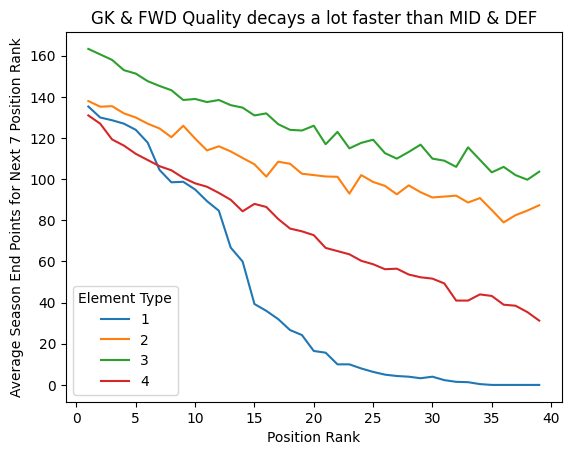

In [47]:
#For each element_type, show the next7 points for each points rank and element type
data = pd.pivot_table(dat, values='next7_position_rank', index=['position_rank','element_type'], aggfunc='mean').reset_index().dropna(how='all')
data = data[data['position_rank']<40]

import matplotlib.pyplot as plt

# Get unique element types in the data
unique_element_types = data['element_type'].unique()
# Set up a color map for the lines
color_map = plt.colormaps.get_cmap('tab10')
# Plot each line separately with a unique color for each element_type
for i, element_type in enumerate(unique_element_types):
    subset_data = data[data['element_type'] == element_type]
    plt.plot(subset_data["position_rank"], subset_data["next7_position_rank"], label=element_type, color=color_map(i))

# plt.plot(data["position_rank"], data["next7_position_rank"])
plt.xlabel("Position Rank")
plt.ylabel("Average Season End Points for Next 7 Position Rank")
plt.legend(title="Element Type")
plt.title("GK & FWD Quality decays a lot faster than MID & DEF")
plt.show()

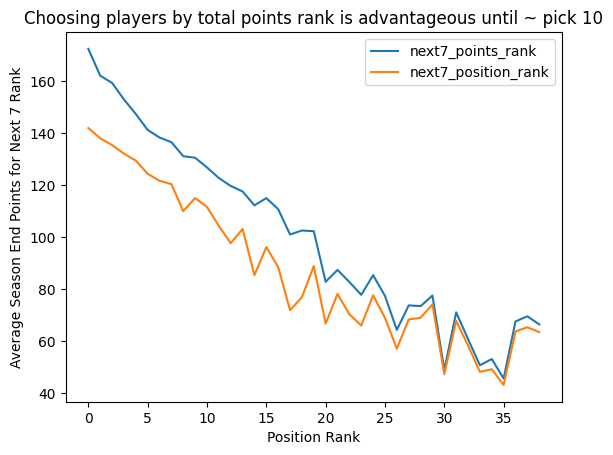

In [48]:
#Compare next7_points_rank & next7_position_rank as position rank increases
data2 = pd.pivot_table(dat, values=['next7_points_rank','next7_position_rank'], index=['position_rank'], aggfunc='mean').reset_index().dropna(how='all')
data2 = data2[data2['position_rank']<40]

plt.plot(data2["next7_points_rank"], label='next7_points_rank')
plt.plot(data2["next7_position_rank"], label='next7_position_rank')
plt.xlabel("Position Rank")
plt.ylabel("Average Season End Points for Next 7 Rank")
plt.legend()
plt.title("Choosing players by total points rank is advantageous until ~ pick 10")
plt.show()